In [107]:
import pandas as pd
import numpy as np
import json 
from pandas.io.json import json_normalize
import requests
from geopy.geocoders import Nominatim

In [18]:
!wget -q -O 'yelp.json' https://www.dropbox.com/s/lcaf8c1rkb3sdav/yelp_academic_dataset_business.json?dl=0

In [23]:
data = [json.loads(line) for line in open('yelp.json', 'r')]

In [43]:
data

[{'business_id': '1SWheh84yJXfytovILXOAQ',
  'name': 'Arizona Biltmore Golf Club',
  'address': '2818 E Camino Acequia Drive',
  'city': 'Phoenix',
  'state': 'AZ',
  'postal_code': '85016',
  'latitude': 33.5221425,
  'longitude': -112.0184807,
  'stars': 3.0,
  'review_count': 5,
  'is_open': 0,
  'attributes': {'GoodForKids': 'False'},
  'categories': 'Golf, Active Life',
  'hours': None},
 {'business_id': 'QXAEGFB4oINsVuTFxEYKFQ',
  'name': 'Emerald Chinese Restaurant',
  'address': '30 Eglinton Avenue W',
  'city': 'Mississauga',
  'state': 'ON',
  'postal_code': 'L5R 3E7',
  'latitude': 43.6054989743,
  'longitude': -79.652288909,
  'stars': 2.5,
  'review_count': 128,
  'is_open': 1,
  'attributes': {'RestaurantsReservations': 'True',
   'GoodForMeal': "{'dessert': False, 'latenight': False, 'lunch': True, 'dinner': True, 'brunch': False, 'breakfast': False}",
   'BusinessParking': "{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}",
   'Caters'

In [27]:
reviews_df = json_normalize (data)


In [67]:
arizona_data = reviews_df[reviews_df['state']=='AZ'].reset_index()

In [68]:
arizona_data.shape

(56686, 61)

In [69]:
arizona_data.columns

Index(['index', 'address', 'attributes', 'attributes.AcceptsInsurance',
       'attributes.AgesAllowed', 'attributes.Alcohol', 'attributes.Ambience',
       'attributes.BYOB', 'attributes.BYOBCorkage', 'attributes.BestNights',
       'attributes.BikeParking', 'attributes.BusinessAcceptsBitcoin',
       'attributes.BusinessAcceptsCreditCards', 'attributes.BusinessParking',
       'attributes.ByAppointmentOnly', 'attributes.Caters',
       'attributes.CoatCheck', 'attributes.Corkage',
       'attributes.DietaryRestrictions', 'attributes.DogsAllowed',
       'attributes.DriveThru', 'attributes.GoodForDancing',
       'attributes.GoodForKids', 'attributes.GoodForMeal',
       'attributes.HairSpecializesIn', 'attributes.HappyHour',
       'attributes.HasTV', 'attributes.Music', 'attributes.NoiseLevel',
       'attributes.Open24Hours', 'attributes.OutdoorSeating',
       'attributes.RestaurantsAttire', 'attributes.RestaurantsCounterService',
       'attributes.RestaurantsDelivery', 'attribut

In [99]:
restaurant_attributes = arizona_data[['attributes.Alcohol','attributes.BYOBCorkage','attributes.Caters','attributes.CoatCheck','attributes.DietaryRestrictions','attributes.DriveThru','attributes.RestaurantsAttire', 'attributes.RestaurantsCounterService',
       'attributes.RestaurantsDelivery', 'attributes.RestaurantsGoodForGroups',
       'attributes.RestaurantsReservations',
       'attributes.RestaurantsTableService', 'attributes.RestaurantsTakeOut']]

In [100]:
filtered_data = restaurant_attributes.dropna(axis=0, how='all')

In [101]:
restaurants = arizona_data.iloc[filtered_data.index.values,:]

In [102]:
restaurants.shape

(13991, 61)

In [128]:
restaurants.head()

,index,address,attributes,attributes.AcceptsInsurance,attributes.AgesAllowed,attributes.Alcohol,attributes.Ambience,attributes.BYOB,attributes.BYOBCorkage,attributes.BestNights,...,hours.Tuesday,hours.Wednesday,is_open,latitude,longitude,name,postal_code,review_count,stars,state
3,11,2450 E Indian School Rd,NaN,NaN,NaN,u'none',"{'romantic': False, 'intimate': False, 'touris...",NaN,NaN,NaN,...,7:0-0:0,7:0-0:0,1,33.495194,-112.028588,Taco Bell,85016,18,3.0,AZ
10,47,709 W Ray Rd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12:0-21:0,12:0-21:0,0,33.320386,-111.804652,Bruster's Real Ice Cream,85233,57,4.5,AZ
12,52,1306 W University Dr,NaN,NaN,u'allages',u'full_bar',"{'romantic': False, 'intimate': False, 'classy...",NaN,NaN,"{'monday': False, 'tuesday': False, 'friday': ...",...,NaN,NaN,1,33.422164,-111.859035,Club Red,85201,64,2.5,AZ
13,53,"17025 N Scottsdale Rd, Ste 110",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9:0-18:0,9:0-18:0,1,33.640308,-111.924528,Nothing Bundt Cakes,85255,174,4.0,AZ
17,68,20645 N 28th St,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,33.674570,-112.021834,M Catering by Michael's,85050,7,5.0,AZ


In [129]:
phoenix_zipcode = [85003,85004,85006,85007,85008,85009,85012,85013,85014,85015,85016,85017,85018,85019,85020,85021,85022,85023,85024,85026,85027,
                   85028,85029,85031,85032,85033,85034,85035,85037,85039,85040,85041,85042,85043,85044,85045,85048,85050,85051,85053,85054,85065,
                   85073,85083,85085,85086,85087,85001,85002,85005,85010,85011,85030,85036,85038,85046,85060,85061,85062,85063,85064,85066,85067, 
                   85068,85069,85070,85071,85072,85074,85075,85076,85078,85079,85080,85082]

In [159]:
pd.to_numeric(restaurants['postal_code'])
pd.to_numeric(restaurants['review_count'])

3         18
10        57
12        64
13       174
17         7
21       269
27        90
33        14
35        33
37       320
40        84
43       526
48         9
51       188
52       104
61        13
70       563
73         6
80        23
81        14
92         9
94       427
101       85
106       21
116        8
117        8
118      140
122       96
130        8
131       46
        ... 
56558     11
56562     69
56566    167
56568    110
56569    569
56572     35
56575      6
56582     30
56602     59
56603     11
56609     95
56612    120
56613     13
56614     13
56616     62
56618     53
56622      8
56625     55
56627     17
56635     14
56639     28
56640      7
56643     21
56644     23
56645      6
56646     13
56647    337
56649     41
56657    151
56664     11
Name: review_count, Length: 13991, dtype: int64

In [165]:
phoenix_restaurants = restaurants[(restaurants['postal_code'].apply(lambda x: x in phoenix_zipcode)) & (restaurants['review_count'] >50)].reset_index()
phoenix_restaurants.shape

(1885, 62)

In [176]:
closed_restaurants = phoenix_restaurants[phoenix_restaurants['is_open']==0]
open_restaurants = phoenix_restaurants[phoenix_restaurants['is_open']==1].iloc[0:999,:]
print(closed_restaurants.shape, open_restaurants.shape)

(362, 62) (999, 62)


In [108]:
!conda install -c conda-forge folium=0.5.0 --yes

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.6.16  |       hecc5488_0         145 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    altair-3.2.0               |           py36_0         770 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    certifi-2019.6.16          |           py36_1         149 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.3 MB

The following NEW packages will be 

In [109]:
import folium 

In [123]:
address = 'Phoenix, AZ'
geolocator = Nominatim(user_agent="AZ_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

In [167]:
restaurants2 = phoenix_restaurants.iloc[0:999,:]

In [178]:
map_arizona = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, long, name, star in zip(closed_restaurants['latitude'],closed_restaurants['longitude'],closed_restaurants['name'],closed_restaurants['stars']):
    label = '{},{}'.format(name,star)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, long],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        parse_html=False).add_to(map_arizona) 
    
for lat, long, name, star in zip(open_restaurants['latitude'],open_restaurants['longitude'],open_restaurants['name'],open_restaurants['stars']):
    label = '{},{}'.format(name,star)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, long],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_arizona) 
    
    
map_arizona

In [313]:
regions = phoenix_restaurants.groupby('postal_code')
df = pd.DataFrame(columns = ['count','zipcode','avg_stars','closedown_rate'])
count = []
zipcode = []
avg_stars = []
closedown_rate = []
top_rate = []

In [314]:
for name, group in regions:
    count.append(group.shape[0])
    
    zipcode.append(int(name))
    avg_stars.append(np.mean(group['stars']))
    try:
        rate = 1 - group['is_open'].value_counts()[1]/group['is_open'].count()
        closedown_rate.append(rate)
    except:
        closedown_rate.append(1)

In [315]:
df['count'] = count
df['zipcode'] = zipcode
df['avg_stars'] = avg_stars
df['closedown_rate'] = closedown_rate

In [321]:
df.set_index('zipcode').sort_values(by=['count'],ascending = False)

,count,avg_stars,closedown_rate
zipcode,,,
85016,189,3.875661,0.211640
85004,161,3.745342,0.335404
85018,134,3.884328,0.164179
85032,127,3.629921,0.188976
85014,84,3.904762,0.238095
85044,72,3.687500,0.125000
85022,71,3.640845,0.211268
85003,66,3.689394,0.227273
85034,64,3.460938,0.109375


In [303]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'number of restaurants in different zipcodes')

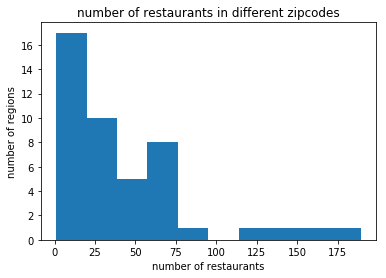

In [307]:
plt.hist(df['count'])
plt.xlabel('number of restaurants')
plt.ylabel('number of regions')
plt.title('histograms of numbers of restaurants in different zipcodes')

Text(0.5, 1.0, 'restaurant closedown rates in different zipcodes')

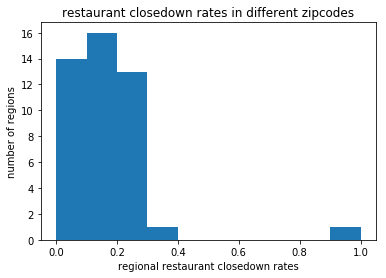

In [318]:
plt.hist(df['closedown_rate'])
plt.xlabel('regional restaurant closedown rates')
plt.ylabel('number of regions')
plt.title('histogram of regional restaurant closedown rates')

Text(0.5, 1.0, 'histogram of average ratings of restaurants ')

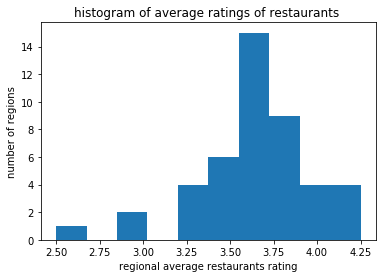

In [320]:
plt.hist(df['avg_stars'])
plt.xlabel('regional average restaurants rating')
plt.ylabel('number of regions')
plt.title('histogram of average ratings of restaurants ')